## 測試clean data 使用不同Classifier的預測結果

In [1]:
import glob
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
from  sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier


random_state = 0

In [4]:
img_list = glob.glob("./clean_data/*/*.png")

total_img = []
total_label = []

In [29]:
im_list = glob.glob("./clean_data/*/*.png")
im_list

['./clean_data/497/委_24.png',
 './clean_data/497/委_4.png',
 './clean_data/497/委_50.png',
 './clean_data/497/委_34.png',
 './clean_data/497/委_36.png',
 './clean_data/497/委_25.png',
 './clean_data/497/委_29.png',
 './clean_data/497/委_13.png',
 './clean_data/497/委_21.png',
 './clean_data/497/委_28.png',
 './clean_data/497/委_15.png',
 './clean_data/497/委_14.png',
 './clean_data/497/委_39.png',
 './clean_data/497/委_32.png',
 './clean_data/497/委_45.png',
 './clean_data/497/委_23.png',
 './clean_data/497/委_44.png',
 './clean_data/497/委_38.png',
 './clean_data/497/委_49.png',
 './clean_data/497/委_5.png',
 './clean_data/497/委_9.png',
 './clean_data/497/委_17.png',
 './clean_data/497/委_30.png',
 './clean_data/497/委_10.png',
 './clean_data/497/委_1.png',
 './clean_data/497/委_16.png',
 './clean_data/497/委_35.png',
 './clean_data/497/委_40.png',
 './clean_data/497/委_37.png',
 './clean_data/497/委_3.png',
 './clean_data/497/委_42.png',
 './clean_data/497/委_43.png',
 './clean_data/497/委_19.png',
 './clean_data/

# Load Image 

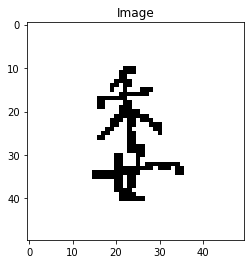

In [5]:
plt.title('Image')
plt.imshow(Image.open(img_list[0]))

In [4]:
for file in img_list:
    img  = Image.open(file).convert('L')
    total_label.append(file.split('_')[0][-1])
    total_img.append(np.array(img).reshape(-1))
total_img = np.array(total_img)
total_label = np.array(total_label)
print("Total label shape:",total_label.shape)
print("Total image shape:",total_img.shape)

Total label shape: (508,)
Total image shape: (508, 2500)


# Split train and test set

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(total_img,total_label,test_size=0.2,random_state=0)

In [6]:
print("X_train shape:",X_train.shape)
print("Y_train shape:",Y_train.shape)
print("X_test shape:",X_test.shape)
print("Y_test shape:",Y_test.shape)

X_train shape: (406, 2500)
Y_train shape: (406,)
X_test shape: (102, 2500)
Y_test shape: (102,)


# predict fumction

In [7]:
def predict_accuracy(y, y_hat):
    return sum(y == y_hat) / y.shape[0]

# PCA

In [8]:
def PCA_decomposition(n_components, train_img):
    pca = PCA(n_components=n_components)
    pca_img = pca.fit_transform(train_img)
    pca_inv_img = pca.inverse_transform(pca_img)
    img_compressed = (np.stack(pca_imv_img[-1],axis = 0)).astype(np.uint8)
    img_pca = Image.fromarray(img_compressed.reshape(train_img.shape), 'L')
    return pca_img, pca_inv_img, img_pca

將圖片透過PCA降維

In [9]:
pca = PCA(0.95,random_state=random_state)
pipe = make_pipeline(StandardScaler(),pca)
transformed_images = pca.fit_transform(X_train)
print("transformed_images.shape:",transformed_images.shape)


transformed_images.shape: (406, 205)


# explained variance ratio

Text(0, 0.5, 'cumulative explained variance')

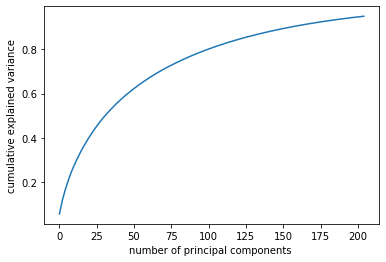

In [10]:
cum_explained_var_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cum_explained_var_ratio)
plt.xlabel("number of principal components ")
plt.ylabel("cumulative explained variance")

# 將pca components reshape 50x50 

principle components shape: (205, 2500)


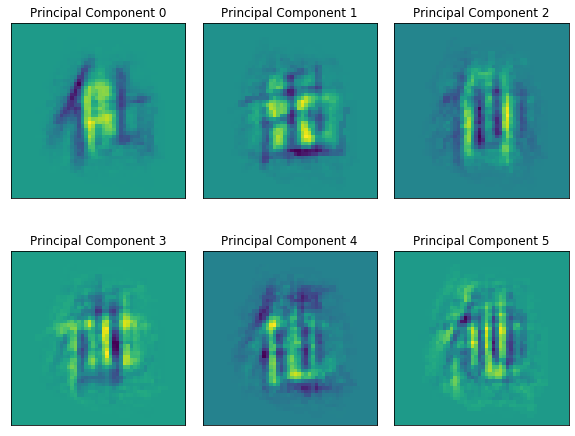

In [11]:
from sklearn.preprocessing import minmax_scale
scaled_comps = minmax_scale(pca.components_,axis=1)
print("principle components shape:",pca.components_.shape)
fig,axes = plt.subplots(2,3,figsize=(10,8),
                        subplot_kw = {"xticks":[],'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    c = scaled_comps[i]
    ax.set_title('Principal Component '+str(i))
    ax.imshow(c.reshape(50,50))

# PCA-DecisionTree

In [15]:
for i in range(90,0,-10):
    pca = PCA(i/100,random_state=random_state)
    pipe = make_pipeline(StandardScaler(),pca)
    transformed_images = pca.fit_transform(X_train)
#     print("transformed_images.shape:",transformed_images.shape)
    transform_test = pca.transform(X_test)
    classifier = DecisionTreeClassifier()
    classifier.fit(transformed_images,Y_train)
    res = classifier.predict(transform_test)
    acc = predict_accuracy(res,Y_test)
    print("{} components accuracy:{:.2%}".format(pca.components_.shape[0],acc))




155 components accuracy:40.20%
101 components accuracy:44.12%
69 components accuracy:35.29%
47 components accuracy:46.08%
32 components accuracy:53.92%
21 components accuracy:53.92%
13 components accuracy:42.16%
7 components accuracy:44.12%
3 components accuracy:43.14%


# PCA - SVC

In [18]:
from sklearn import svm

In [19]:
for i in range(90,0,-10):
    pca = PCA(i/100,random_state=random_state)
    pipe = make_pipeline(StandardScaler(),pca)
    transformed_images = pca.fit_transform(X_train)
#     print("transformed_images.shape:",transformed_images.shape)
    transform_test = pca.transform(X_test)
    clf = svm.SVC()
    clf.fit(transformed_images,Y_train)
    res = clf.predict(transform_test)
    acc = predict_accuracy(res,Y_test)
    print("{} components accuracy:{:.2%}".format(pca.components_.shape[0],acc))

155 components accuracy:83.33%
101 components accuracy:83.33%
69 components accuracy:82.35%
47 components accuracy:78.43%
32 components accuracy:81.37%
21 components accuracy:76.47%
13 components accuracy:76.47%
7 components accuracy:60.78%
3 components accuracy:47.06%


0.7647058823529411